<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/MNIST_Pytorch_S4_Relu_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required Libraries 

In [11]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Structure 
=====================
1. Convolution Layer of 3 x 3 Kernel with Padding of 1 
2. ReLu
3. Maxpool
4. Dropout              - Regularization Technique  
5. Batch Normalization 
6. Image augmentation of random rotation between -7 to +7 degrees

Additional Structures
======================
1. Convolution Layer of 1 x 1 Kernel to consolidate without convolution 
2. Global Average Pooling 
3.  In this step I am going to introducing StepLR with step size 6 and gamma value 0.1. This is the additional feature over the model in Step-4

Target: 
======

In this step

1. Step LR helps to change the leanring rate a little after a fixed number of epochs , which at times helps to converge. So my hope is that it will improve the validation accuracy . So the target is to achieve over 99.4% validation accuracy with same number of parameters 
2. Run it for less than 15 epochs to study how the accuracy changes with StepLR

Result: 
======
1. Observed Train accuracy: 98.39%
2. Validation accuracy:99.25%
3. Number of parameters: 8,582


Analysis: 
========

1. Suprisingly the validation accuracy dropped from the previous step which means that either the StepLR is not helping or the step size is not.
2. Now I have two ways to look at it , The first one is to drop stepLR or use some other mechanism to improve .



In [12]:
from model import model5 as Net

Steps
========
1. Install Torch Summary
2. Print Summary of model

In [13]:
from model import print_model_summary
dropout_prob = 0.1
inputsize= (1, 28, 28)
print_model_summary(dropout_prob, inputsize, Net)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 14, 28, 28]             126
              ReLU-2           [-1, 14, 28, 28]               0
       BatchNorm2d-3           [-1, 14, 28, 28]              28
         Dropout2d-4           [-1, 14, 28, 28]               0
            Conv2d-5           [-1, 14, 28, 28]           1,764
              ReLU-6           [-1, 14, 28, 28]               0
       BatchNorm2d-7           [-1, 14, 28, 28]              28
         Dropout2d-8           [-1, 14, 28, 28]               0
         MaxPool2d-9           [-1, 14, 14, 14]               0
           Conv2d-10           [-1, 14, 14, 14]           1,764
             ReLU-11           [-1, 14, 14, 14]               0
      BatchNorm2d-12           [-1, 14, 14, 14]              28
        Dropout2d-13           [-1, 14, 14, 14]               0
           Conv2d-14           [-1, 14,

G:\TSAI-ERA\Session 7\model.py:294: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Steps
=======
This is the most important step 
1. Define Train loader and Test loader with only 1 worker (MNSIT is easy dataset)
   - Normalize


In [14]:
#torch.manual_seed(1)
from dataset import get_train_loader_rotation, get_test_loader
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

batch_size = 128
rotation_range = (-7.0, 7.0)
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = get_train_loader_rotation(batch_size, rotation_range, kwargs)
test_loader = get_test_loader(batch_size, kwargs)


Steps
=======
1. Define Lists to capture training parameters and testing parameters 


In [15]:
from tqdm import tqdm
from model import get_train, get_test

train_losses = []
test_losses = []
train_acc = []
test_acc = []   

Steps
=====
This is where the real action takes place

1. Define Learning rate and Optimizer 
2. Train for the defined epoch
3. Iterate over the training sample based on the defined batch size
4. Validate on test dataset
5. Capture outcome in the list
6. Validate 
7. Print the result


In [16]:
from torch.optim.lr_scheduler import StepLR

model =  Net(dropout_prob=0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
for epoch in range(1, 15):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = get_train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)  
    test_losses, test_acc = get_test(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.13220582902431488 Batch_id=468 Accuracy=87.94: 100%|██████████████████████████| 469/469 [02:19<00:00,  3.35it/s]



Test set: Average loss: 0.0659, Accuracy: 9814/10000 (98.14%)

Currently Executing Epoch: 2


Loss=0.09353654831647873 Batch_id=468 Accuracy=96.43: 100%|██████████████████████████| 469/469 [01:52<00:00,  4.19it/s]



Test set: Average loss: 0.0444, Accuracy: 9857/10000 (98.57%)

Currently Executing Epoch: 3


Loss=0.04573707655072212 Batch_id=468 Accuracy=97.17: 100%|██████████████████████████| 469/469 [01:40<00:00,  4.66it/s]



Test set: Average loss: 0.0381, Accuracy: 9882/10000 (98.82%)

Currently Executing Epoch: 4


Loss=0.0941784679889679 Batch_id=468 Accuracy=97.60: 100%|███████████████████████████| 469/469 [01:44<00:00,  4.48it/s]



Test set: Average loss: 0.0320, Accuracy: 9900/10000 (99.00%)

Currently Executing Epoch: 5


Loss=0.09530407190322876 Batch_id=468 Accuracy=97.84: 100%|██████████████████████████| 469/469 [01:30<00:00,  5.17it/s]



Test set: Average loss: 0.0260, Accuracy: 9919/10000 (99.19%)

Currently Executing Epoch: 6


Loss=0.10140898078680038 Batch_id=468 Accuracy=97.96: 100%|██████████████████████████| 469/469 [01:53<00:00,  4.13it/s]



Test set: Average loss: 0.0261, Accuracy: 9914/10000 (99.14%)

Currently Executing Epoch: 7


Loss=0.023500999435782433 Batch_id=468 Accuracy=98.20: 100%|█████████████████████████| 469/469 [01:50<00:00,  4.23it/s]



Test set: Average loss: 0.0229, Accuracy: 9918/10000 (99.18%)

Currently Executing Epoch: 8


Loss=0.05415942147374153 Batch_id=468 Accuracy=98.21: 100%|██████████████████████████| 469/469 [01:29<00:00,  5.26it/s]



Test set: Average loss: 0.0218, Accuracy: 9924/10000 (99.24%)

Currently Executing Epoch: 9


Loss=0.06475209444761276 Batch_id=468 Accuracy=98.37: 100%|██████████████████████████| 469/469 [01:45<00:00,  4.43it/s]



Test set: Average loss: 0.0216, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 10


Loss=0.10355249047279358 Batch_id=468 Accuracy=98.29: 100%|██████████████████████████| 469/469 [01:25<00:00,  5.47it/s]



Test set: Average loss: 0.0211, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 11


Loss=0.04235390946269035 Batch_id=468 Accuracy=98.29: 100%|██████████████████████████| 469/469 [02:10<00:00,  3.60it/s]



Test set: Average loss: 0.0215, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 12


Loss=0.030114950612187386 Batch_id=468 Accuracy=98.34: 100%|█████████████████████████| 469/469 [01:22<00:00,  5.70it/s]



Test set: Average loss: 0.0212, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 13


Loss=0.14401432871818542 Batch_id=468 Accuracy=98.39: 100%|██████████████████████████| 469/469 [01:22<00:00,  5.69it/s]



Test set: Average loss: 0.0209, Accuracy: 9923/10000 (99.23%)

Currently Executing Epoch: 14


Loss=0.023900272324681282 Batch_id=468 Accuracy=98.33: 100%|█████████████████████████| 469/469 [01:22<00:00,  5.66it/s]



Test set: Average loss: 0.0210, Accuracy: 9923/10000 (99.23%)



Steps
====
Visualization of Training and Validation Parameters
   - Loss 
   - Accuracy
   

In [17]:
from utils import plot_loss

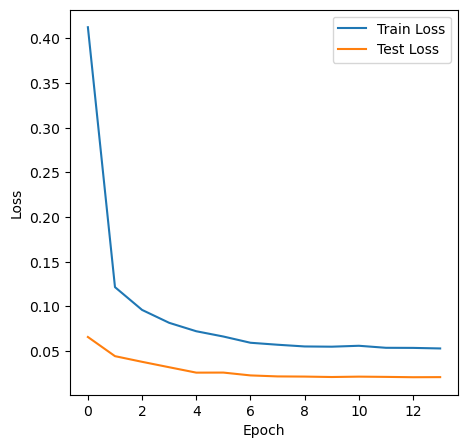

In [18]:
plot_loss(train_losses, test_losses)

In [19]:
from utils import plot_accuracy

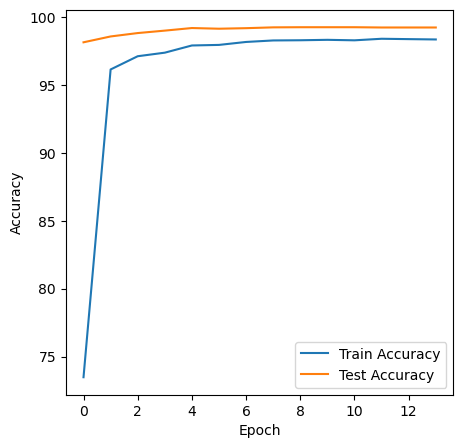

In [20]:
plot_accuracy(train_acc, test_acc)

Summary
=========
